# Evaluation Project - 9
Customer Churn Analysis
Problem Statement:
Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 

You will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models. 
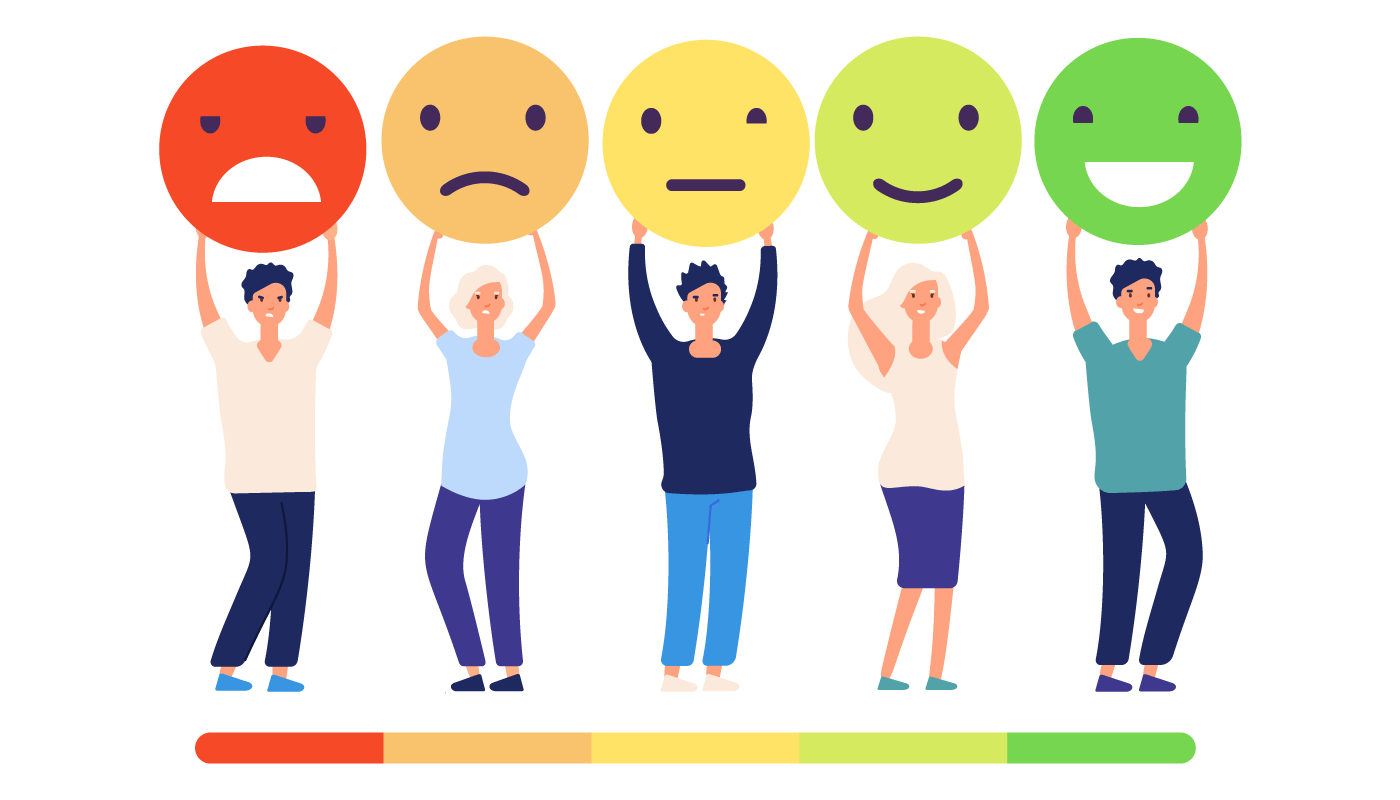

# Importing libraries
Here we are importing all neccessary libraries for our model

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier as xgb
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.metrics import roc_curve,plot_roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report

In [4]:
#importing our data
data = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv")
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Exploratory Data Analysis (EDA)

In [5]:
# Dimension of our data
data.shape

(7043, 21)

So we have about 21 features and 7043 records

In [6]:
# 1st We will chech any duplicate records are present and delete it
data.drop_duplicates(inplace=True)

In [7]:
data.shape

(7043, 21)

The means no duplicate data is present in our data

In [8]:
# Now check our datatypes of data
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

So total 3 numeric and 18 object type data is present in our data

In [9]:
#Let us check the values of our Label
data.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

This means we have a classification problem.

In [10]:
# check the information about he data
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


As per this details we have no null values present in our data, lets s confirm the same using issnull function

In [11]:
#checking null values
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

So our data is ok as no null value sare present

In [12]:
# let us find the values of the our features
# Checking the value counts of each columns
for i in data.columns:
        print(data[i].value_counts())
        print('*'*50)

7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: customerID, Length: 7043, dtype: int64
**************************************************
Male      3555
Female    3488
Name: gender, dtype: int64
**************************************************
0    5901
1    1142
Name: SeniorCitizen, dtype: int64
**************************************************
No     3641
Yes    3402
Name: Partner, dtype: int64
**************************************************
No     4933
Yes    2110
Name: Dependents, dtype: int64
**************************************************
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64
**************************************************
Yes    6361
No      682
Name: PhoneService, dtype: int64
*************************************************

As we can identify that only customer id is unique for all 7043 so, we can remove the same

In [13]:
data.drop('customerID',axis=1,inplace=True)

We can also notice that in TotalCharges there are 11 spaces available, so we have to remvoe the same

In [14]:
#So replacing the spaces with nan
data["TotalCharges"] = data["TotalCharges"].replace(" ",np.nan)
data["TotalCharges"].value_counts()

20.2      11
19.75      9
20.05      8
19.9       8
19.65      8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: TotalCharges, Length: 6530, dtype: int64

In [15]:
# Let's check the null values again
data.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

So we have to remove the same by imputation techniques, let us remove the same using Knn Imputer


In [16]:
from sklearn.impute import KNNImputer

In [17]:
knnimp=KNNImputer(n_neighbors=3)
newdf=pd.DataFrame(knnimp.fit_transform(data[['MonthlyCharges','TotalCharges']]),columns=['MonthlyCharges','TotalCharges'])
newdf

,MonthlyCharges,TotalCharges
0,29.85,29.85
1,56.95,1889.50
2,53.85,108.15
3,42.30,1840.75
4,70.70,151.65
...,...,...
7038,84.80,1990.50
7039,103.20,7362.90
7040,29.60,346.45
7041,74.40,306.60


So we have replaced nan from TotalCharges, using KNNimputers, now replace our Data using this new TotalCharges

In [18]:
data['TotalCharges']=newdf['TotalCharges']

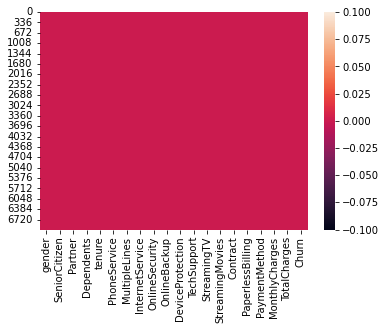

In [150]:
#Now Check any nan is preset or not
sns.heatmap(data.isnull())
plt.show()

# Description of Dataset

In [19]:
# Statistical summary of numerical columns
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2281.651171
std,0.368612,24.559481,30.090047,2265.614981
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.400000
50%,0.000000,29.000000,70.350000,1396.250000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


As there are onlu four numerical columns we will get only details of these columns in describe function

As we noticed SeniorCitizen have only two values 1 and 0.

tenure have only low range of datas

Monthly charges are continues and varies between 18.25 to 118.75 and Total charges is also continous and varies between 18.80 to 8684

# Data Visualization

In [20]:
# Separating numerical and categorcal columns

# Checking for categorical columns
categorical_col=[]
for i in data.dtypes.index:
    if data.dtypes[i]=='object':
        categorical_col.append(i)
print("Categorical columns are:\n",categorical_col)

Categorical columns are:
 ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


In [21]:
# Now checking for numerical columns
numerical_col=[]
for i in data.dtypes.index:
    if data.dtypes[i]!='object':
        numerical_col.append(i)
print("Numerical columns are:\n",numerical_col)

Numerical columns are:
 ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']


# Univariate Analysis
#Plotting categorical columns


No     5174
Yes    1869
Name: Churn, dtype: int64


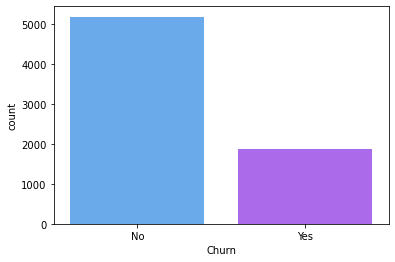

In [22]:
#Visualize the counts of or Label ie Churn
print(data["Churn"].value_counts())
sns.countplot(data["Churn"],palette="cool")
plt.show()

From this we can notice that most of customers were not ready to move out from business, We have to do SMOT sampling to make or data balanced

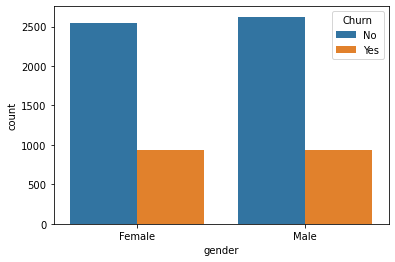

In [23]:
# Visualizing Gender
sns.countplot(data['gender'],hue=data['Churn'])
plt.show()

From this we can identify that for both male similar trends of churn

0    5901
1    1142
Name: SeniorCitizen, dtype: int64


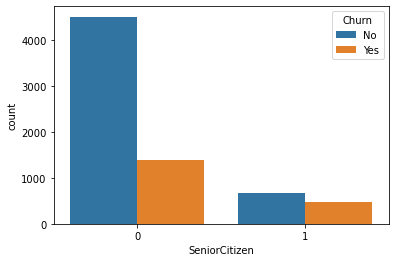

In [24]:
# Visualizing Gender
print(data['SeniorCitizen'].value_counts())
sns.countplot(data['SeniorCitizen'],hue=data['Churn'])
plt.show()

Here '0' denote non SeniorCitizen and '1' denote senior Citizen, The number of Non Senior Citizen is high compared to non Senior citizen. But the percentage of Churn for senior Citizen is high

No     3641
Yes    3402
Name: Partner, dtype: int64


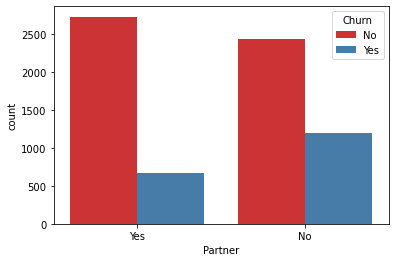

In [25]:
#Visualizing how many customers have their partners
print(data["Partner"].value_counts())
sns.countplot(data["Partner"],palette="Set1",hue=data['Churn'])
plt.show()

It Seams count of both Partners and non partners are equeal, but he Churm rate of  non Partners is litle high, May be partners prefer same business for their needs, also business may providing spacial offers for couples or partners

No     4933
Yes    2110
Name: Dependents, dtype: int64


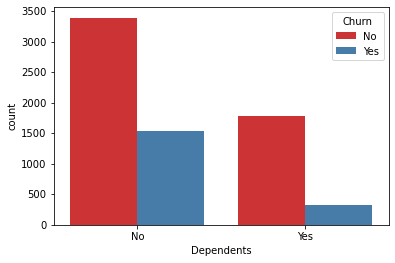

In [26]:
#Visualizing depandends 
print(data["Dependents"].value_counts())
sns.countplot(data["Dependents"],palette="Set1",hue=data['Churn'])
plt.show()

The data of Dependents is less than non dependents, , this is similar to Partners , the Dependents also prefer to do busniness with same, The churn rate is less for Dependents

Yes    6361
No      682
Name: PhoneService, dtype: int64


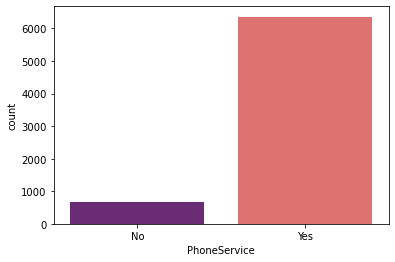

In [27]:
#Visualizing how many customers have Phone Service
print(data["PhoneService"].value_counts())
sns.countplot(data["PhoneService"],palette="magma")
plt.show()

The customers who have phone services are large in numbers.

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64


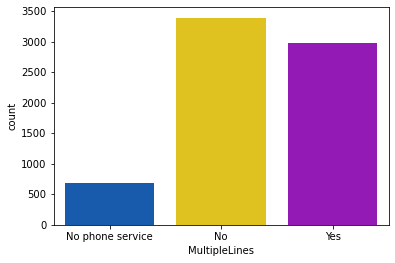

In [28]:
#Visualizing count of multiple lines
print(data["MultipleLines"].value_counts())
sns.countplot(data["MultipleLines"],palette="prism")
plt.show()

As we noticed   customers doenot have any phone service, out of 6361 number of customers , a total of 2971 peoples were using multiple line

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64


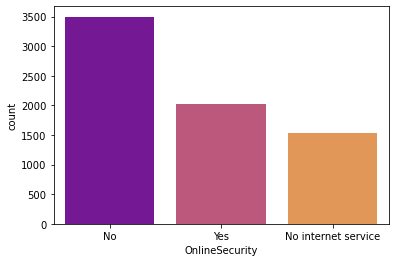

In [29]:
#Visualizing how many customers have OnlineSecurity
print(data["OnlineSecurity"].value_counts())
sns.countplot(data["OnlineSecurity"],palette="plasma")
plt.show()

It is obvious that the customers who have internet services they needs online security and who do not own any internet services, they do not need any online security. But from the count plot we can observe the majority of customers who have internet services but they do not use any online security.

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64


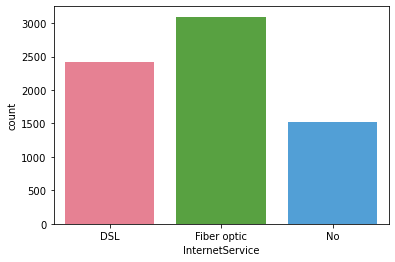

In [30]:
#Visualizing how many customers have Internet services
print(data["InternetService"].value_counts())
sns.countplot(data["InternetService"],palette="husl")
plt.show()

Let us notice that number of internetService holders , DSL and fiber Optics internet Service\


No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64


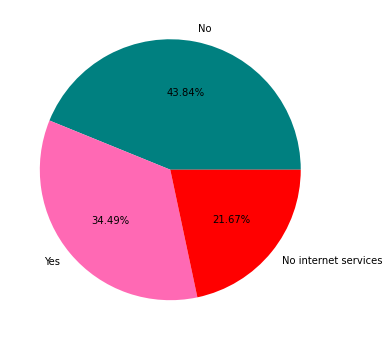

In [31]:
#Visualizing how many customers have Online backup
print(data['OnlineBackup'].value_counts())
labels='No','Yes',"No internet services"
fig, ax = plt.subplots(figsize=(6,6))
colors=["teal","hotpink","r"]
ax.pie(data['OnlineBackup'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=False,colors=colors)
plt.show()

 Out of customers having internet service , around 2429 peoples were using Online Backup provided by the company.

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64


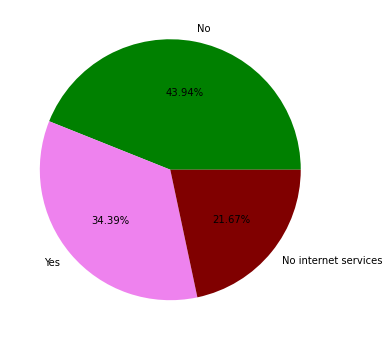

In [32]:
#Visualizing how many customers have DeviceProtection 
print(data['DeviceProtection'].value_counts())
labels='No','Yes',"No internet services"
fig, ax = plt.subplots(figsize=(6,6))
colors=["g","violet","maroon"]
ax.pie(data['DeviceProtection'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=False,colors=colors)
plt.show()

From the count plot we can notice that the customers without any device protection have high counts as compared to the customers who have some kind of device protection. And the customers who do not have internet access they do not need any device protection.

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64


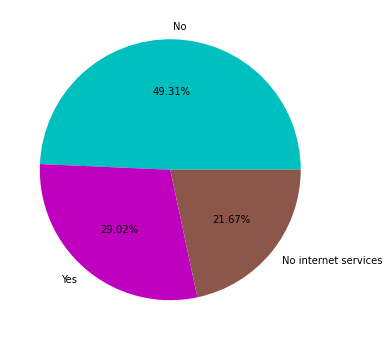

In [33]:
#Visualizing how many customers have TechSupport
print(data['TechSupport'].value_counts())
labels='No','Yes',"No internet services"
fig, ax = plt.subplots(figsize=(6,6))
colors=["c","m","tab:brown"]
ax.pie(data['TechSupport'].value_counts(), labels=labels, autopct='%1.2f%%',colors=colors)
plt.show()

From this we can observe that only 29.02 % of customers were using TechSupport service fom customers, this may be due to less awarness about the facility or or may be have high cost

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64


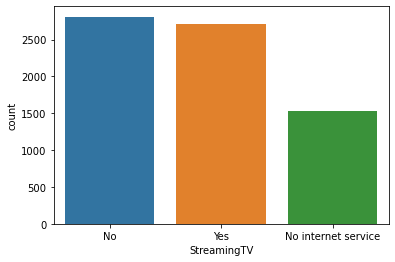

In [34]:
#Visualizing how many customers have StreamingTV
print(data["StreamingTV"].value_counts())
sns.countplot(data["StreamingTV"])
plt.show()

#Equal no of peoples were using internet uses TV online service.

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64


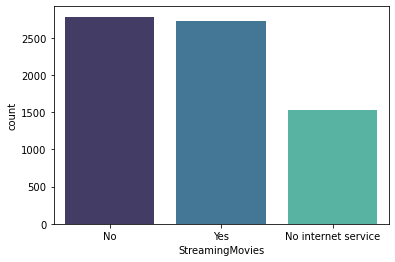

In [35]:
#Visualizing how many customers have StreamingMovies
print(data["StreamingMovies"].value_counts())
sns.countplot(data["StreamingMovies"],palette="mako")
plt.show()

Only 50 % of people who using internet uses Streaming Movie facility

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64


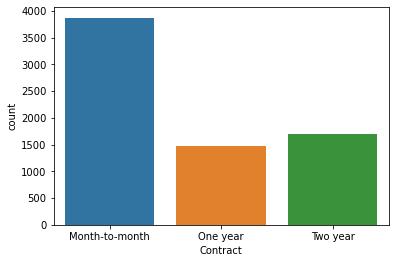

In [36]:
#Visualizing how many customers have Contract
print(data["Contract"].value_counts())
sns.countplot(data["Contract"])
plt.show()


Most people prefer month on month billing cycle, Only few peoples chooses yearly or two year plans

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64


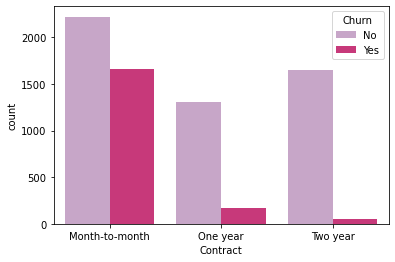

In [37]:
#Visualizing how many customers have Contract
print(data["Contract"].value_counts())
sns.countplot(data["Contract"],palette="PuRd",hue=data['Churn'])
plt.show()


Month on Month peoples Churn is less, Yearly based and Two Year based customers Churn rate is high, So compnay should analyse the reason for thata to reduce Churn

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64


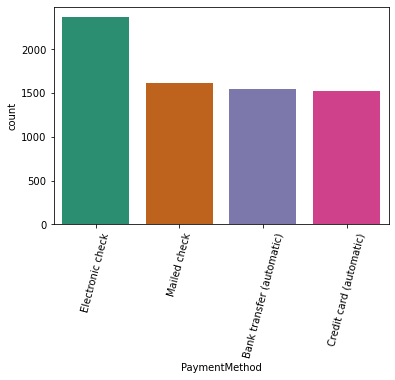

In [38]:
#Visualizing how many customers have Contract
print(data["PaymentMethod"].value_counts())
sns.countplot(data["PaymentMethod"],palette="Dark2")
plt.xticks(rotation=75)
plt.show()

Mose peaploe prefer Electrocic Check,All other methods were almost same rate

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64


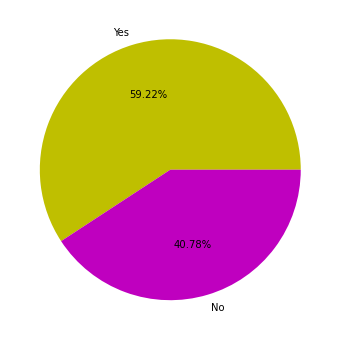

In [39]:
#Visualizing how many customers have PaymentMethod
print(data['PaperlessBilling'].value_counts())
labels='Yes',"No"
fig, ax = plt.subplots(figsize=(6,6))
colors=["y","m"]
ax.pie(data['PaperlessBilling'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=False,colors=colors)
plt.show()

Most peoples prefer paperless billing, that means online billing

# Bivariate Analysis

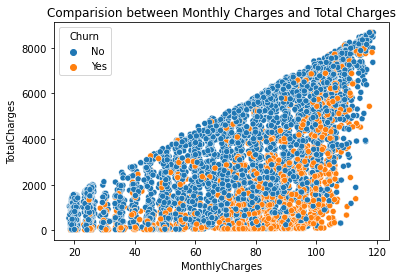

In [40]:
#Comparing Monthly charges and Total Charges 
plt.title("Comparision between Monthly Charges and Total Charges")
sns.scatterplot( x = "MonthlyCharges",y = "TotalCharges", data = data, hue='Churn')
plt.show()

From this we can identify that customers having high monthly charges going out. 

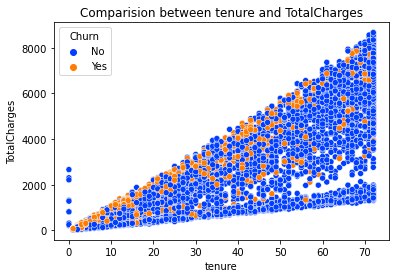

In [41]:
#Comparing tenure and TotalCharges 
plt.title("Comparision between tenure and TotalCharges")
sns.scatterplot( x = "tenure",y = "TotalCharges", data = data,hue="Churn",palette="bright")
plt.show()

Here we can notice the strong linear relation between the features. As the tenure increases, TotalCharges also increases rapidly. If the customers have low tenure services then there is high chance of churn.

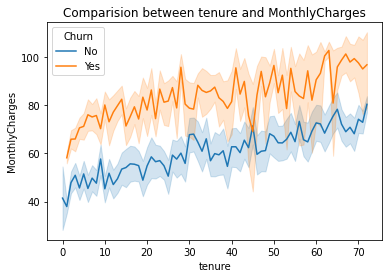

In [42]:
#Comparing tenure and TotalCharges 
plt.title("Comparision between tenure and MonthlyCharges")
sns.lineplot( x = "tenure",y = "MonthlyCharges", data = data,hue="Churn")
plt.show()

As monthly charges increases churn rate also increase rapidly

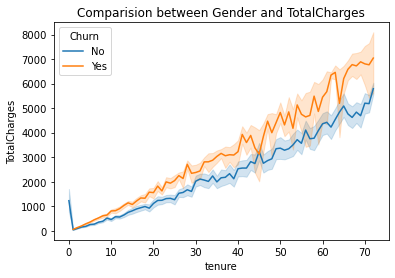

In [43]:
#Comparing Gender and TotalCharges 
plt.title("Comparision between Gender and TotalCharges")
sns.lineplot( x = "tenure",y = "TotalCharges", data = data,hue="Churn")
plt.show()

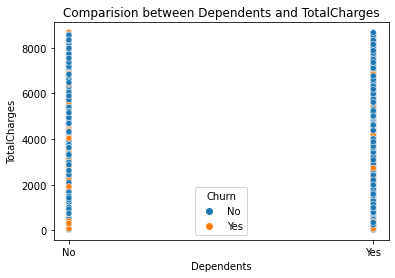

In [44]:
#Comparing Dependents and TotalCharges 
plt.title("Comparision between Dependents and TotalCharges")
sns.scatterplot( x = "Dependents",y = "TotalCharges", data = data,hue='Churn')
plt.show()

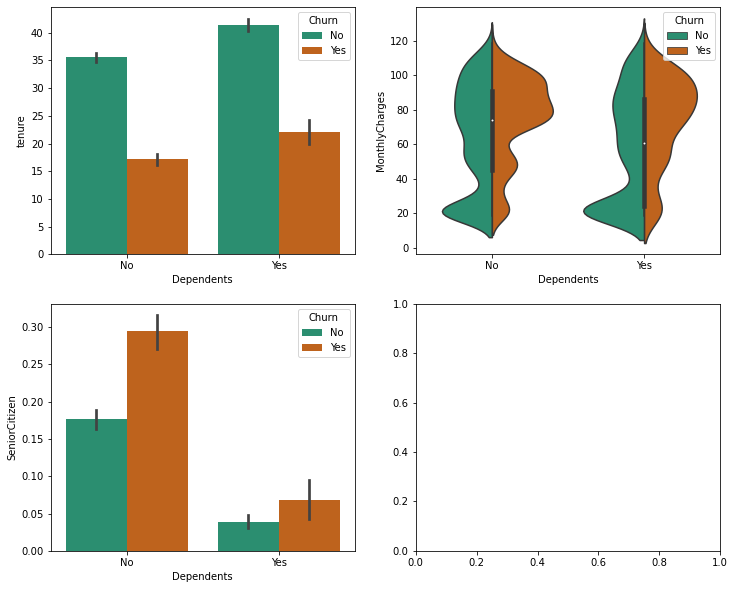

In [45]:
fig,axes=plt.subplots(2,2,figsize=(12,10))

# Checking Churn level in tenure
sns.barplot(x='Dependents',y='tenure',ax=axes[0,0],data=data,palette="Dark2",hue="Churn")


# Checking Churn level in MonthlyCharges
sns.violinplot(x='Dependents',y='MonthlyCharges',ax=axes[0,1],data=data,palette="Dark2",hue="Churn",split=True)

# Checking Churn level in SeniorCitizen
sns.barplot(x='Dependents',y='SeniorCitizen',ax=axes[1,0],data=data,palette="Dark2",hue="Churn")
plt.show()

The customers who have dependents with high tenure, then the churned level is high 80-110. TThe customers having Monthly charges between 80-110 with dependents have high churn rate and when the customers have no dependents and having monthly charges around 20 then the ratio of churn is very high. If the customer is a senior citizen and have no dependents then there is a tendancy of grtting churned.



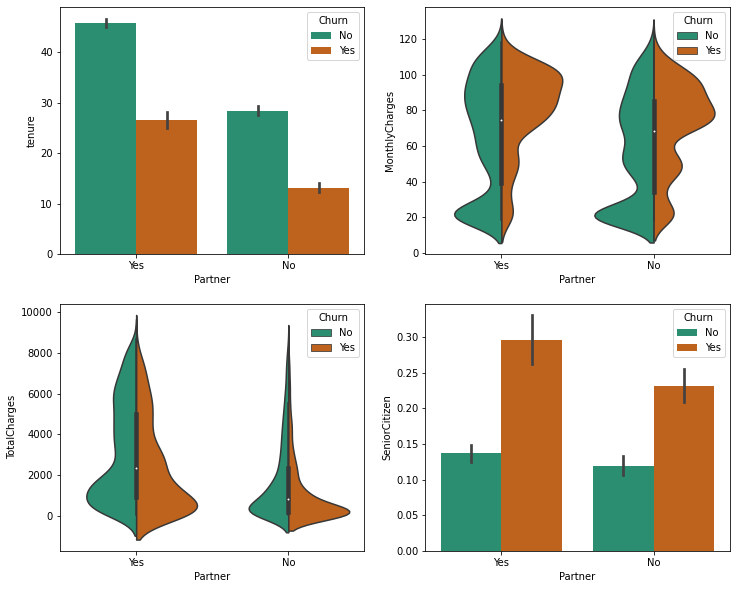

In [46]:
fig,axes=plt.subplots(2,2,figsize=(12,10))

# Checking Churn level in tenure
sns.barplot(x='Partner',y='tenure',ax=axes[0,0],data=data,palette="Dark2",hue="Churn")


# Checking Churn level in MonthlyCharges
sns.violinplot(x='Partner',y='MonthlyCharges',ax=axes[0,1],data=data,palette="Dark2",hue="Churn",split=True)

# Checking Churn level in MonthlyCharges
sns.violinplot(x='Partner',y='TotalCharges',ax=axes[1,0],data=data,palette="Dark2",hue="Churn",split=True)

# Checking Churn level in SeniorCitizen
sns.barplot(x='Partner',y='SeniorCitizen',ax=axes[1,1],data=data,palette="Dark2",hue="Churn")
plt.show()

As Dependednts the Paterners have high tenure, Partners with high motnhly charges have a tentency of churn, Asll others are similar to depandesnts, that means multi colearity exist, we can check later

Now let us check monthly charges vs PhoneService, Streaming Movies, internet, Onlince Security,online backup, Streaming TV etc as we know if monthly charges increases churn rate isn alos incresing

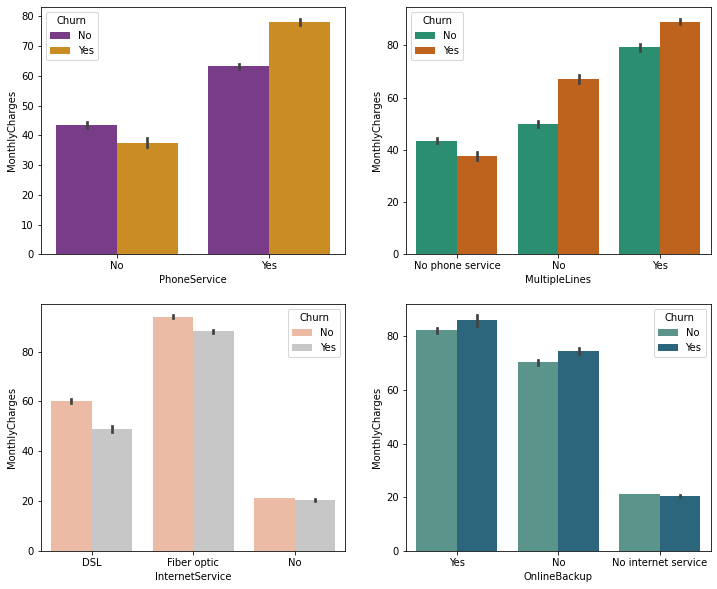

In [47]:
fig,axes=plt.subplots(2,2,figsize=(12,10))

# Checking PhoneService and  Monthly Charges with Churn as hue
sns.barplot(x='PhoneService',y='MonthlyCharges',ax=axes[0,0],data=data,palette="CMRmap",hue="Churn")


# Checking Multiplelines and  Monthly Charges with Churn as huein MonthlyCharges
sns.barplot(x='MultipleLines',y='MonthlyCharges',ax=axes[0,1],data=data,palette="Dark2",hue="Churn")

# Checking internetservice and  Monthly Charges with Churn as hue
sns.barplot(x='InternetService',y='MonthlyCharges',ax=axes[1,0],data=data,palette="RdGy",hue="Churn")

# Checking with onlineService and  Monthly Charges with Churn as hue
sns.barplot(x='OnlineBackup',y='MonthlyCharges',ax=axes[1,1],data=data,palette="crest",hue="Churn")
plt.show()

All these features have almost same relation between Monthly charges and churn, As additional feature it iccure more cost. So we will  remove many features by using best features slection techniques later

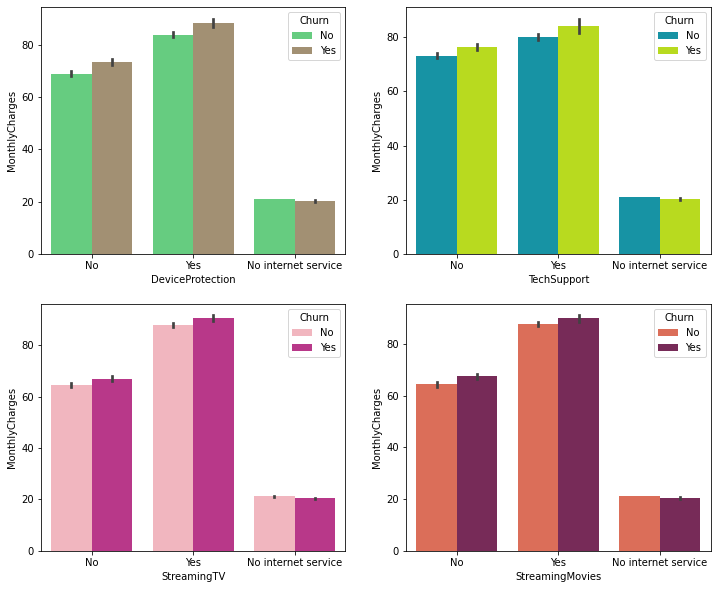

In [48]:
fig,axes=plt.subplots(2,2,figsize=(12,10))

# Checking DeviceProtection and  Monthly Charges with Churn as hue
sns.barplot(x='DeviceProtection',y='MonthlyCharges',ax=axes[0,0],data=data,palette="terrain",hue="Churn")


# Checking TechSupport and  Monthly Charges with Churn as huein MonthlyCharges
sns.barplot(x='TechSupport',y='MonthlyCharges',ax=axes[0,1],data=data,palette="nipy_spectral",hue="Churn")

# Checking StreamingTC and  Monthly Charges with Churn as hue
sns.barplot(x='StreamingTV',y='MonthlyCharges',ax=axes[1,0],data=data,palette="RdPu",hue="Churn")

# Checking with SteamingMovies and  Monthly Charges with Churn as hue
sns.barplot(x='StreamingMovies',y='MonthlyCharges',ax=axes[1,1],data=data,palette="rocket_r",hue="Churn")
plt.show()

Similar to above graphs the additional features cost extra amount and churn rates are high, all the fearutes shows same type of effect on monthly charges

In [49]:
categorical_col

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

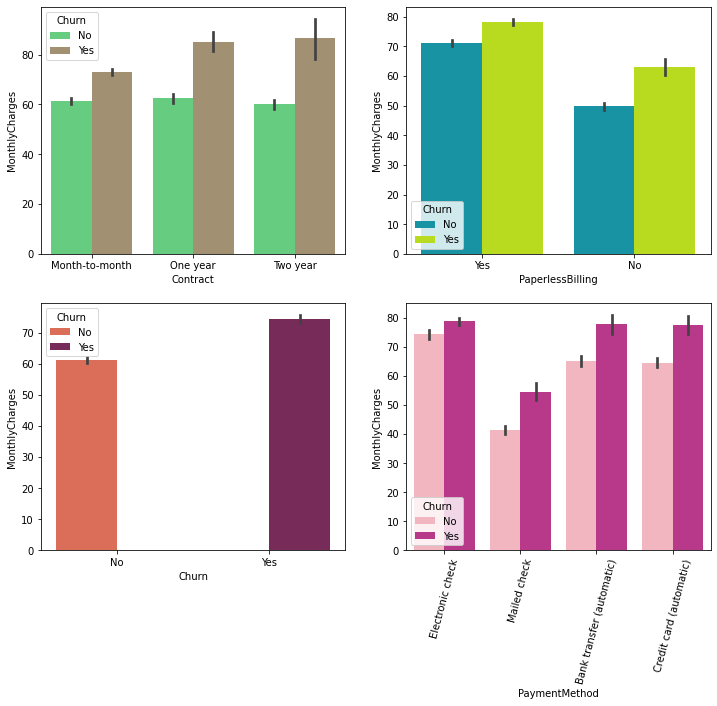

In [50]:
fig,axes=plt.subplots(2,2,figsize=(12,10))

# Checking Contract and  Monthly Charges with Churn as hue
sns.barplot(x='Contract',y='MonthlyCharges',ax=axes[0,0],data=data,palette="terrain",hue="Churn")


# Checking Papaerless Billing and  Monthly Charges with Churn as huein MonthlyCharges
sns.barplot(x='PaperlessBilling',y='MonthlyCharges',ax=axes[0,1],data=data,palette="nipy_spectral",hue="Churn")

# Checking with SteamingMovies and  Monthly Charges with Churn as hue
sns.barplot(x='Churn',y='MonthlyCharges',ax=axes[1,0],data=data,palette="rocket_r",hue="Churn")

# Checking StreamingTC and  Monthly Charges with Churn as hue
sns.barplot(x='PaymentMethod',y='MonthlyCharges',ax=axes[1,1],data=data,palette="RdPu",hue="Churn")
plt.xticks(rotation=75)
plt.show()

Same as above figure

# Multivariate Analysis

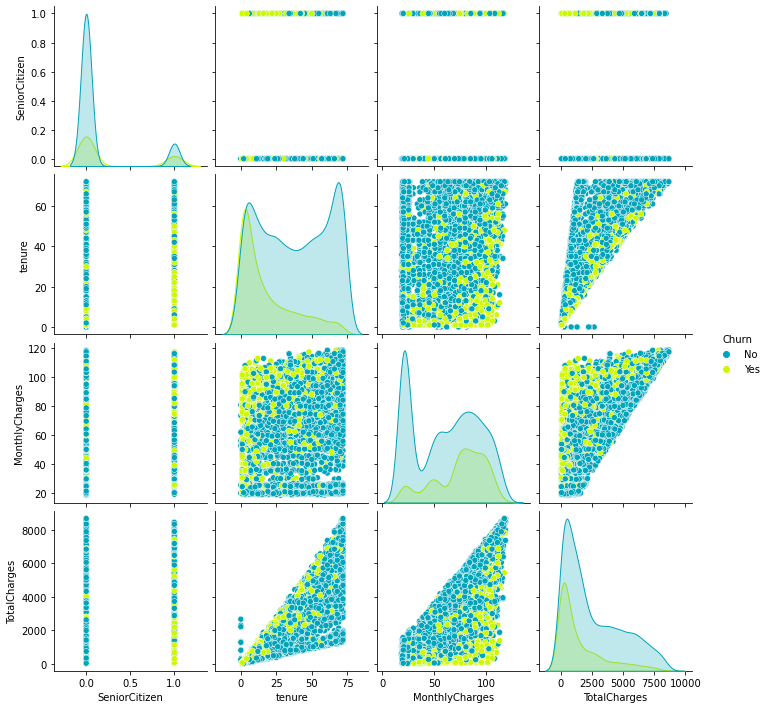

In [51]:
sns.pairplot(data,hue="Churn",palette="nipy_spectral")
plt.show()


This will gives pairwise relationships between our numerical features, From this we can notice less outliers
From this also we can easily identify that Monthly charges have a greater influance on Churn
Monlthy charges and Total Charges also have strong linear relationship

# Conclusion

1. Monthly chagres have high relationship with churn rate, 
2. Additional features like InternetServcie, MultipleLInes, Online Back up, etc have extra ocst and because of that monthly charges also increasing.
3. Many features pocess same relation with Churn, so we can use any feature selection method to select best features
4. Our Label Churn not equaly balanced so we need to make it balanced
5. Partnes and depandensts prefer to continue business , churn rate is comparatevily low


# Identifying the outliers

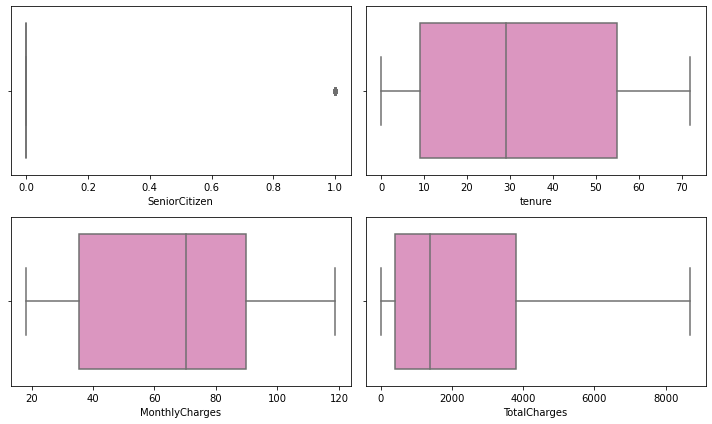

In [52]:
# Let's check the outliers by ploting box plot

plt.figure(figsize=(10,6),facecolor='white')
plotnumber=1
for column in numerical_col:
    if plotnumber<=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.boxplot(data[column],palette="Set2_r")
        plt.xlabel(column,fontsize=10)
        plt.yticks(rotation=0,fontsize=10)
    plotnumber+=1
plt.tight_layout()

As we noticed earlier the Outliers are less in pair plot.
The column Senior Citizen has outliers but it contains categorical data so no need to remove outliers. Apart from this none of the columns have outliers.


# Checking for skewness

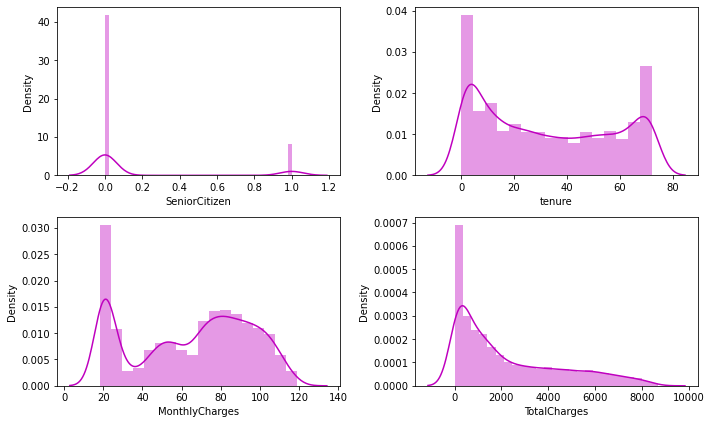

In [53]:
# Let's check how the data has been distributed in remaining columns

plt.figure(figsize=(10,6),facecolor='white')
plotnumber=1
for column in numerical_col:
    if plotnumber<=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.distplot(data[column],color="m")
        plt.xlabel(column,fontsize=10)
        plt.yticks(rotation=0,fontsize=10)
    plotnumber+=1
plt.tight_layout()

From this we can identify that TotalCherges have high skewness, and SeniorCitizen alos have some skewness, but as it is catagorical we doenot need to do anything, We can agin confirm same using skew() function

In [54]:
# Checking the skewness
data.skew()

SeniorCitizen     1.833633
tenure            0.239540
MonthlyCharges   -0.220524
TotalCharges      0.963380
dtype: float64

As we nocticed columns SeniorCitizen and TotalCharges have skewness in the data. Since SeniorCitizen is categorical no need to remove skewness but in TotalCharges. Since TotalCharges is continuous in nature, lets use cube root method to remove skewness.

# Removing skewness

In [55]:
# Removing skewness using square root method
data["TotalCharges"] = np.cbrt(data["TotalCharges"])

In [56]:
#Checking skewness again
data.skew()

SeniorCitizen     1.833633
tenure            0.239540
MonthlyCharges   -0.220524
TotalCharges      0.013614
dtype: float64

Skewness has been reduced

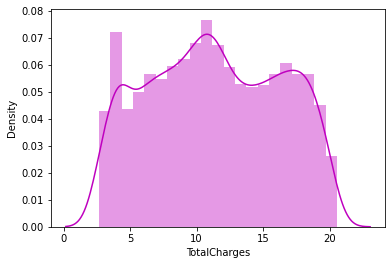

In [57]:
# Let's visualize how the data has been distributed in TotalCharges after removing skewness
sns.distplot(data["TotalCharges"],color="m")
plt.show()

# Encoding the categorical columns using Encoding Techniques

In [58]:
LE = LabelEncoder()
for i in data.columns:
    if data[i].dtypes=="object":
        data[i]=LE.fit_transform(data[i].values.reshape(-1,1))
data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,3.102045,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,12.362766,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,4.764407,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,12.255516,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,5.332704,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,12.579230,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,19.454331,0
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,7.023391,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,6.743066,1


We Encoded all catagorical features

# Correlation between the target variable and independent variables using HEAT map

In [59]:
# Checking the correlation between features and the target
cor = data.corr()
cor

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.006739,-0.000863,-0.015017,-0.012057,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.014569,-0.002321,-0.008612
SeniorCitizen,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.146185,-0.032310,-0.128221,-0.013632,-0.021398,-0.151268,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.220173,0.106678,0.150889
Partner,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,0.000891,0.150828,0.153130,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,0.096848,0.343067,-0.150448
Dependents,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024991,0.044590,0.152166,0.091015,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,-0.113890,0.083524,-0.164221
tenure,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,-0.030359,0.325468,0.370876,0.371105,0.322942,0.289373,0.296866,0.671607,0.006152,-0.370436,0.247900,0.869535,-0.352229
PhoneService,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.020538,0.387436,-0.015198,0.024105,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.247398,0.087762,0.011942
MultipleLines,-0.006739,0.146185,0.142410,-0.024991,0.343032,-0.020538,1.000000,-0.109216,0.007141,0.117327,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.433576,0.462469,0.038037
InternetService,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,-0.109216,1.000000,-0.028416,0.036138,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.323260,-0.208140,-0.047291
OnlineSecurity,-0.015017,-0.128221,0.150828,0.152166,0.325468,-0.015198,0.007141,-0.028416,1.000000,0.185126,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,-0.053878,0.245948,-0.289309
OnlineBackup,-0.012057,-0.013632,0.153130,0.091015,0.370876,0.024105,0.117327,0.036138,0.185126,1.000000,0.187757,0.195748,0.147186,0.136722,0.280980,-0.013370,-0.124847,0.119777,0.351146,-0.195525


This give orelation between variables, Lets us find it more datails using heatmap

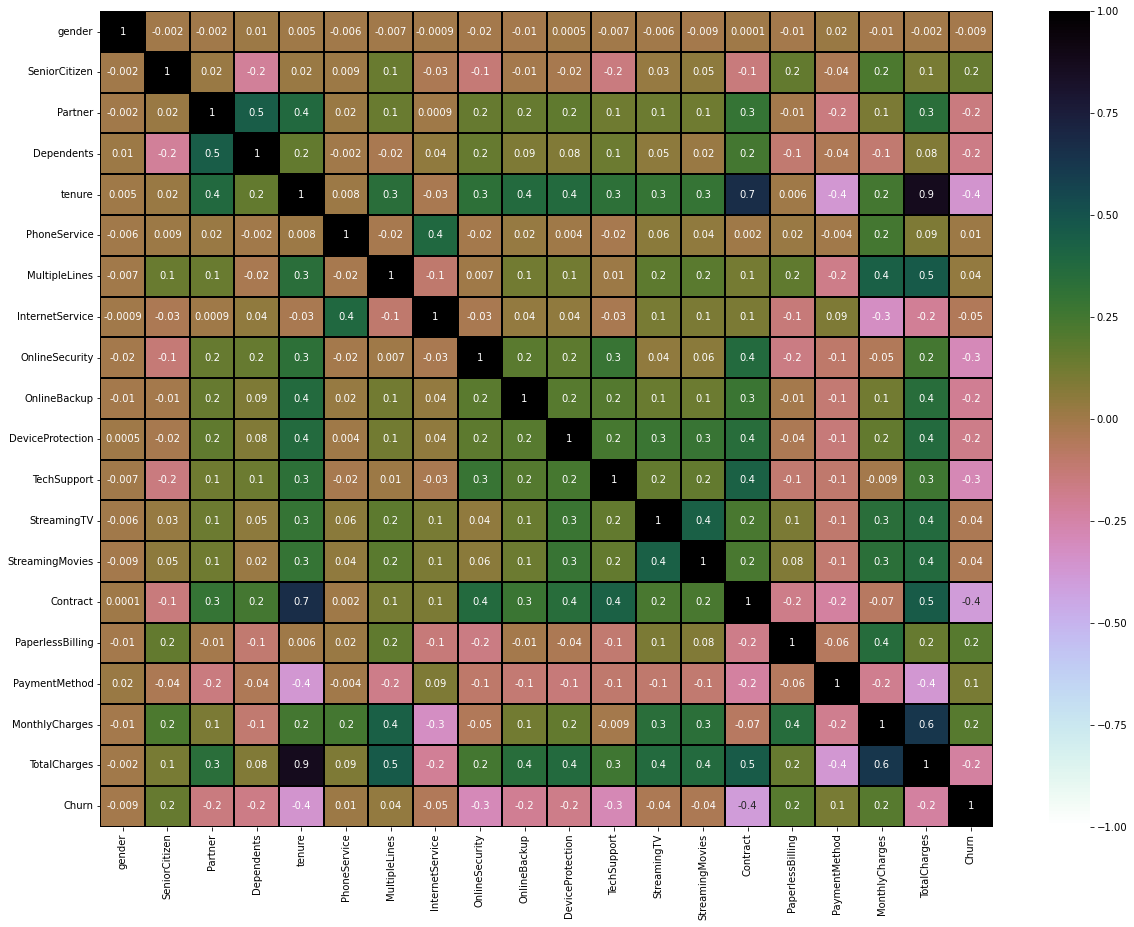

In [60]:
# Visualizing the correlation matrix by plotting heat map.
plt.figure(figsize=(20,15))
sns.heatmap(data.corr(),linewidths=.1,vmin=-1, vmax=1, fmt='.1g',linecolor="black", annot = True, annot_kws={'size':10},cmap="cubehelix_r")
plt.show()

1. From this we can findout that features have both positevily and negatevily related
2. TotalCharges and tunure highly co-related
3. Contract and Tenure also highly related
4. Monthly charges and Total charges also related

In [61]:
# letus separate the corelation with Churn from this
cor['Churn'].sort_values(ascending=False)

Churn               1.000000
MonthlyCharges      0.193356
PaperlessBilling    0.191825
SeniorCitizen       0.150889
PaymentMethod       0.107062
MultipleLines       0.038037
PhoneService        0.011942
gender             -0.008612
StreamingTV        -0.036581
StreamingMovies    -0.038492
InternetService    -0.047291
Partner            -0.150448
Dependents         -0.164221
DeviceProtection   -0.178134
OnlineBackup       -0.195525
TotalCharges       -0.233144
TechSupport        -0.282492
OnlineSecurity     -0.289309
tenure             -0.352229
Contract           -0.396713
Name: Churn, dtype: float64

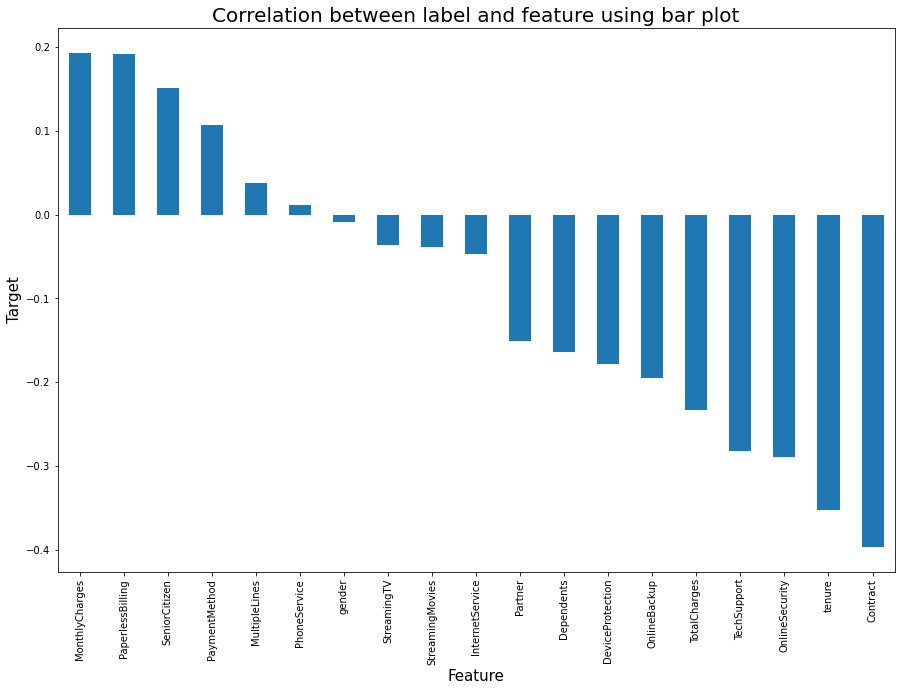

In [62]:
# Visualize the same using barplot
plt.figure(figsize=(15,10))
data.corr()['Churn'].sort_values(ascending=False).drop('Churn').plot(kind='bar')
plt.xlabel('Feature',fontsize=15)
plt.ylabel('Target',fontsize=15)
plt.title('Correlation between label and feature using bar plot',fontsize=20)
plt.show()

From the above bar plot we can notice the positive and negative correlation between the features and the target. Here the features gender and PhoneService have very less correlation with the column.

# As there are high number of features and Some are showing same type of relationships we can use 80% best features for modeling

In [63]:
# Best Feature Selection using SelectPercentile

In [64]:
from sklearn.feature_selection import SelectPercentile,chi2
#Seperating Feature and Label
x=data.drop('Churn',axis=1)
y=data.Churn

In [65]:
#find best 85% features
sper=SelectPercentile(score_func=chi2,percentile=85)
sper=sper.fit(x,y)

In [66]:
#indices of best features
col=sper.get_support(indices=True)

In [67]:
#Best Features
feature=x.columns[col]
feature

Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges'],
      dtype='object')

In [68]:
x=x[feature]
x.head()

,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,1,0,1,1,0,0,2,0,0,0,0,1,2,29.85,3.102045
1,0,0,0,34,0,0,2,0,2,0,0,1,0,3,56.95,12.362766
2,0,0,0,2,0,0,2,2,0,0,0,0,1,3,53.85,4.764407
3,0,0,0,45,1,0,2,0,2,2,0,1,0,0,42.30,12.255516
4,0,0,0,2,0,1,0,0,0,0,0,0,1,2,70.70,5.332704


In [69]:
x.shape

(7043, 16)

 Now we have a total of 16 best features for modeling.

# Feature Scaling using Standard Scalarization

In [70]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

In [71]:
#scaled data
x

,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,-0.439916,1.034530,-0.654012,-1.277445,0.062723,-1.183234,-0.918838,1.242550,-1.027910,-0.925262,-1.121405,-0.828207,0.829798,0.398558,-1.160323,-1.685049
1,-0.439916,-0.966622,-0.654012,0.066327,-0.991588,-1.183234,1.407321,-1.029919,1.245111,-0.925262,-1.121405,0.371271,-1.205113,1.334863,-0.259629,0.206168
2,-0.439916,-0.966622,-0.654012,-1.236724,-0.991588,-1.183234,1.407321,1.242550,-1.027910,-0.925262,-1.121405,-0.828207,0.829798,1.334863,-0.362660,-1.345562
3,-0.439916,-0.966622,-0.654012,0.514251,0.062723,-1.183234,1.407321,-1.029919,1.245111,1.396299,-1.121405,0.371271,-1.205113,-1.474052,-0.746535,0.184265
4,-0.439916,-0.966622,-0.654012,-1.236724,-0.991588,0.172250,-0.918838,-1.029919,-1.027910,-0.925262,-1.121405,-0.828207,0.829798,0.398558,0.197365,-1.229505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,-0.439916,1.034530,1.529024,-0.340876,1.117034,-1.183234,1.407321,-1.029919,1.245111,1.396299,1.138411,0.371271,0.829798,1.334863,0.665992,0.250374
7039,-0.439916,1.034530,1.529024,1.613701,1.117034,0.172250,-0.918838,1.242550,1.245111,-0.925262,1.138411,0.371271,0.829798,-0.537747,1.277533,1.654401
7040,-0.439916,1.034530,1.529024,-0.870241,0.062723,-1.183234,1.407321,-1.029919,-1.027910,-0.925262,-1.121405,-0.828207,0.829798,0.398558,-1.168632,-0.884235
7041,2.273159,1.034530,-0.654012,-1.155283,1.117034,0.172250,-0.918838,-1.029919,-1.027910,-0.925262,-1.121405,-0.828207,0.829798,1.334863,0.320338,-0.941482


# Checking Mulicolinearity using Variance Inflation Factor(VIF)

In [72]:
# Finding varience inflation factor in each scaled column i.e, x.shape[1] (1/(1-R2))

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

# Let's check the values
vif

,VIF values,Features
0,1.144695,SeniorCitizen
1,1.462579,Partner
2,1.382220,Dependents
3,12.944090,tenure
4,1.354722,MultipleLines
5,1.253228,InternetService
6,1.253005,OnlineSecurity
7,1.190976,OnlineBackup
8,1.271826,DeviceProtection
9,1.308781,TechSupport


Again the TotalCharges have high multicoliniarity, this will over fit our model, so we need to drop this feature

In [73]:
x=x.drop('TotalCharges',axis=1)

In [74]:
# Again checking VIF value to confirm whether the multicollinearity still exists or not
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

# Let's check the values
vif

,VIF values,Features
0,1.144663,SeniorCitizen
1,1.460658,Partner
2,1.380528,Dependents
3,2.745958,tenure
4,1.348415,MultipleLines
5,1.211279,InternetService
6,1.244467,OnlineSecurity
7,1.184348,OnlineBackup
8,1.262646,DeviceProtection
9,1.298551,TechSupport


Now the Mulicolinearity problem hasbeen resolved. Now check the Label

In [75]:
#Resolving Oversampling issue
y.value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

# SMOT

In [76]:
# Oversampling the data
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x, y = SM.fit_resample(x,y)

In [77]:
#again checking value counts of Label
y.value_counts()

0    5174
1    5174
Name: Churn, dtype: int64

Now the Label is balanced, let us move forward to Modeling

# Modeling

In [78]:
#find the best random State
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =i)
    RFC = RandomForestClassifier()
    RFC.fit(x_train, y_train)
    pred = RFC.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.8605475040257649  on Random_state  166


###### The best accuracy score is 86.05% at random state 166

In [79]:
#Creating train_test split at best randomstate
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)

# Random Forest Classifier

In [80]:
# Checking accuracy for Random Forest Classifier
RFC = RandomForestClassifier()
RFC.fit(x_train,y_train)

# Prediction
predRFC = RFC.predict(x_test)

rfc=accuracy_score(y_test, predRFC)
print(rfc)
print(confusion_matrix(y_test, predRFC))
print(classification_report(y_test,predRFC))

0.8524959742351047
[[1304  219]
 [ 239 1343]]
              precision    recall  f1-score   support

           0       0.85      0.86      0.85      1523
           1       0.86      0.85      0.85      1582

    accuracy                           0.85      3105
   macro avg       0.85      0.85      0.85      3105
weighted avg       0.85      0.85      0.85      3105



# The accuracy using Random forest classifier is 85.24%

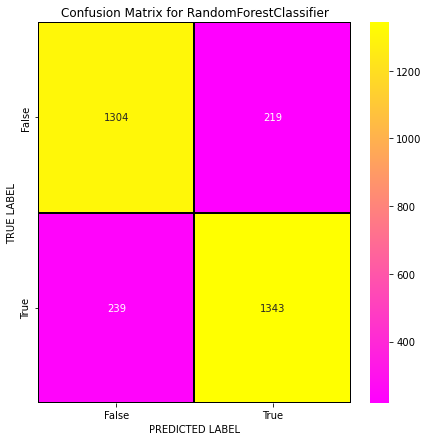

In [81]:
# Lets plot confusion matrix for RandomForestClassifier
cm = confusion_matrix(y_test,predRFC)

x_axis_labels = ["False","True"]
y_axis_labels = ["False","True"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="spring",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for RandomForestClassifier')
plt.show()

# Logistic Regression

In [82]:
# Checking accuracy for Logistic Regression Classifier
LR = LogisticRegression()
LR.fit(x_train,y_train)

# Prediction
predLR = LR.predict(x_test)

lr=accuracy_score(y_test, predLR)
print(lr)
print(confusion_matrix(y_test, predLR))
print(classification_report(y_test,predLR))

0.7694041867954912
[[1103  420]
 [ 296 1286]]
              precision    recall  f1-score   support

           0       0.79      0.72      0.75      1523
           1       0.75      0.81      0.78      1582

    accuracy                           0.77      3105
   macro avg       0.77      0.77      0.77      3105
weighted avg       0.77      0.77      0.77      3105



##### Accuracy Score for Logistic Regression is= 76.94%

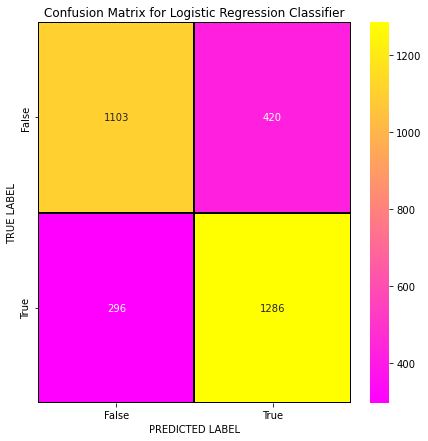

In [83]:
# Lets plot confusion matrix for Logistic Regression
cm = confusion_matrix(y_test,predLR)

x_axis_labels = ["False","True"]
y_axis_labels = ["False","True"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="spring",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Logistic Regression Classifier')
plt.show()

# Support Vector Machine Classifier

In [84]:
# Checking accuracy for Support Vector Machine Classifier
svc = SVC()
svc.fit(x_train,y_train)

# Prediction
predsvc = svc.predict(x_test)

sv=accuracy_score(y_test, predsvc)
print(sv)
print(confusion_matrix(y_test, predsvc))
print(classification_report(y_test,predsvc))

0.8083735909822867
[[1154  369]
 [ 226 1356]]
              precision    recall  f1-score   support

           0       0.84      0.76      0.80      1523
           1       0.79      0.86      0.82      1582

    accuracy                           0.81      3105
   macro avg       0.81      0.81      0.81      3105
weighted avg       0.81      0.81      0.81      3105



# The accuracy score using support vector machine classifier is 80.83%

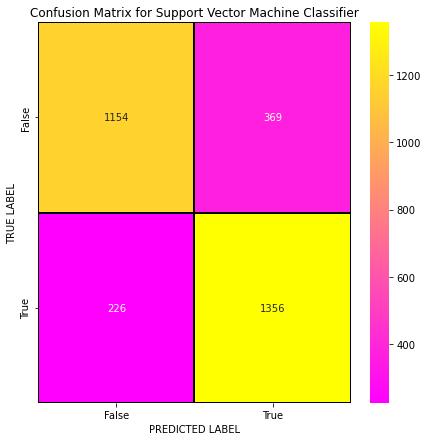

In [85]:
# Lets plot confusion matrix for Support Vector Machine Classifier
cm = confusion_matrix(y_test,predsvc)

x_axis_labels = ["False","True"]
y_axis_labels = ["False","True"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="spring",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Support Vector Machine Classifier')
plt.show()

# Gradient Boosting Classifier

In [86]:
# Checking accuracy for Gradient Boosting Classifier
GB = GradientBoostingClassifier()
GB.fit(x_train,y_train)

# Prediction
predGB = GB.predict(x_test)

gbc=accuracy_score(y_test, predGB)
print(gbc)
print(confusion_matrix(y_test, predGB))
print(classification_report(y_test,predGB))

0.8508856682769727
[[1248  275]
 [ 188 1394]]
              precision    recall  f1-score   support

           0       0.87      0.82      0.84      1523
           1       0.84      0.88      0.86      1582

    accuracy                           0.85      3105
   macro avg       0.85      0.85      0.85      3105
weighted avg       0.85      0.85      0.85      3105



# The accuracy score using gradient boosting classifer is 85.08%

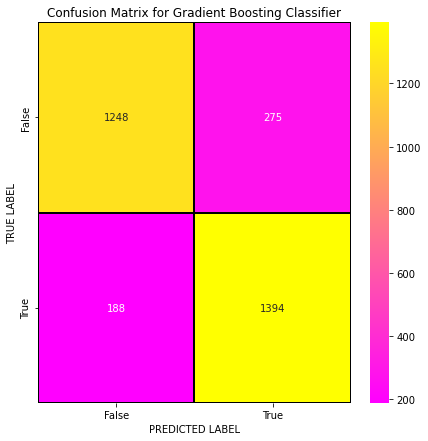

In [87]:
# Lets plot confusion matrix for Gradient Boosting Classifier
cm = confusion_matrix(y_test,predGB)

x_axis_labels = ["False","True"]
y_axis_labels = ["False","True"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="spring",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Gradient Boosting Classifier')
plt.show()

# AdaBoost Classifier

In [88]:
# Checking accuracy for AdaBoost Classifier
ABC = AdaBoostClassifier()
ABC.fit(x_train,y_train)

# Prediction
predABC = ABC.predict(x_test)

abc=accuracy_score(y_test, predABC)
print(abc)
print(confusion_matrix(y_test, predABC))
print(classification_report(y_test,predABC))

0.822866344605475
[[1185  338]
 [ 212 1370]]
              precision    recall  f1-score   support

           0       0.85      0.78      0.81      1523
           1       0.80      0.87      0.83      1582

    accuracy                           0.82      3105
   macro avg       0.83      0.82      0.82      3105
weighted avg       0.82      0.82      0.82      3105



# The accuracy using Adaboost Classifier is 82.28%

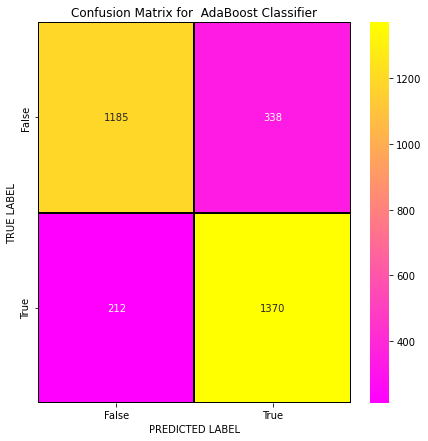

In [89]:
# Lets plot confusion matrix for  AdaBoost Classifier
cm = confusion_matrix(y_test,predABC)

x_axis_labels = ["False","True"]
y_axis_labels = ["False","True"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="spring",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for  AdaBoost Classifier')
plt.show()

# BaggingClassifier

In [90]:
# Checking accuracy for BaggingClassifier
BC = BaggingClassifier()
BC.fit(x_train,y_train)

# Prediction
predBC = BC.predict(x_test)

bc=accuracy_score(y_test, predBC)
print(bc)
print(confusion_matrix(y_test, predBC))
print(classification_report(y_test,predBC))

0.8264090177133655
[[1309  214]
 [ 325 1257]]
              precision    recall  f1-score   support

           0       0.80      0.86      0.83      1523
           1       0.85      0.79      0.82      1582

    accuracy                           0.83      3105
   macro avg       0.83      0.83      0.83      3105
weighted avg       0.83      0.83      0.83      3105



# The accuracy using Bagging Classifier is 82.64%

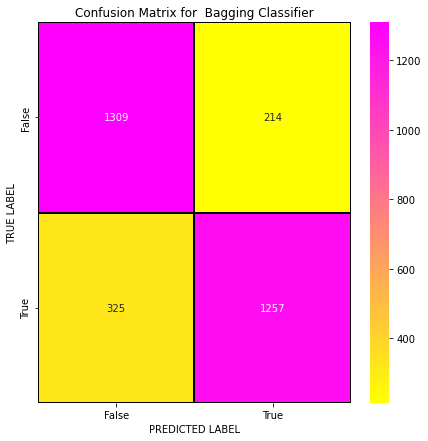

In [91]:
# Lets plot confusion matrix for  Bagging Classifier
cm = confusion_matrix(y_test,predBC)

x_axis_labels = ["False","True"]
y_axis_labels = ["False","True"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="spring_r",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for  Bagging Classifier')
plt.show()

# XGBClassifier

In [92]:
# Checking accuracy for XGBClassifier
XGB = xgb(verbosity=0)
XGB.fit(x_train,y_train)

# Prediction
predXGB = XGB.predict(x_test)
xg=accuracy_score(y_test, predXGB)
print(accuracy_score(y_test, predXGB))
print(confusion_matrix(y_test, predXGB))
print(classification_report(y_test,predXGB))

0.8608695652173913
[[1314  209]
 [ 223 1359]]
              precision    recall  f1-score   support

           0       0.85      0.86      0.86      1523
           1       0.87      0.86      0.86      1582

    accuracy                           0.86      3105
   macro avg       0.86      0.86      0.86      3105
weighted avg       0.86      0.86      0.86      3105



# The accuracy using XBG Classifier is 86.08%

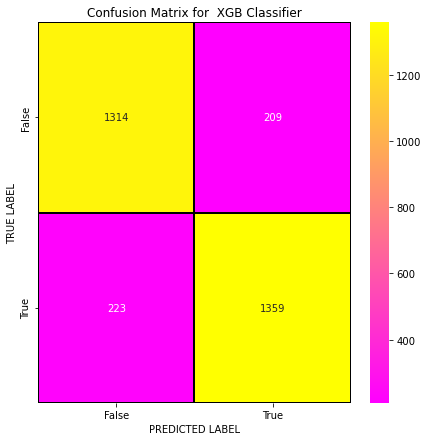

In [93]:
# Lets plot confusion matrix for  XGBClassifier
cm = confusion_matrix(y_test,predXGB)

x_axis_labels = ["False","True"]
y_axis_labels = ["False","True"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="spring",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for  XGB Classifier')
plt.show()

# ExtraTreesClassifier

In [94]:
# Checking accuracy for ExtraTreesClassifier
XT = ExtraTreesClassifier()
XT.fit(x_train,y_train)

# Prediction
predXT = XT.predict(x_test)

xt=accuracy_score(y_test, predXT)
print(xt)
print(confusion_matrix(y_test, predXT))
print(classification_report(y_test,predXT))

0.8582930756843801
[[1302  221]
 [ 219 1363]]
              precision    recall  f1-score   support

           0       0.86      0.85      0.86      1523
           1       0.86      0.86      0.86      1582

    accuracy                           0.86      3105
   macro avg       0.86      0.86      0.86      3105
weighted avg       0.86      0.86      0.86      3105



# The accuracy using ExtraTrees Classifier is 85.82%

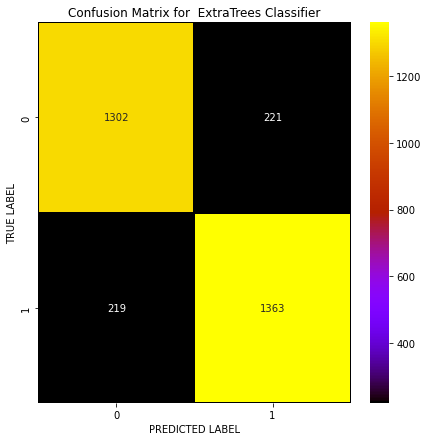

In [95]:
# Lets plot confusion matrix for  ExtraTreesClassifier
cm = confusion_matrix(y_test,predXT)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="gnuplot",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for  ExtraTrees Classifier')
plt.show()

# Checking cross validation score

In [106]:
# cv score for Random Forest Classifier
rf_cv=cross_val_score(RFC,x,y,cv=5).mean()
print(rf_cv)

0.8476127700609176


In [107]:
# cv score for Logistic Regression
lr_cv=cross_val_score(LR,x,y,cv=5).mean()
print(lr_cv)

0.7662366706126555


In [108]:
# cv score for Support Vector Machine Classifier
sv_cv=cross_val_score(svc,x,y,cv=5).mean()
print(sv_cv)

0.7898177606862753


In [109]:
# cv score for Gradient Boosting Classifier
gb_cv=cross_val_score(GB,x,y,cv=5).mean()
gb_cv

0.8300241662638956

In [110]:
# cv score for AdaBoosting Classifier
ada_cv=cross_val_score(ABC,x,y,cv=5).mean()
print(ada_cv)

0.8104034948853913


In [111]:
# cv score for Bagging Classifier
bc_cv=cross_val_score(BC,x,y,cv=5).mean()
print(bc_cv)

0.8233574528991344


In [112]:
# cv score for XGB Classifier
xbg_cv=cross_val_score(XGB,x,y,cv=5).mean()
print(xbg_cv)

0.8388221339628237


In [113]:
# cv score for Extra Trees Classifier
ex_cv=cross_val_score(XT,x,y,cv=5).mean()
print(ex_cv)

0.8561150454255714


In [114]:
model_list=['Random Forest Classifier',' Logistic Regression','Support Vector Machine Classifier','Gradient Boosting Classifier','AdaBoosting Classifier','Bagging Classifier','XGB Classifier','Extra Trees Classifier']       

In [115]:
accuracyscore=[rfc,lr,sv,gbc,abc,bc,xg,xt]

In [116]:
crossval=[rf_cv,lr_cv,sv_cv,gb_cv,ada_cv,bc_cv,xbg_cv,ex_cv]

In [117]:
diff=[]
for i in range(len(model_list)):
    diff.append(accuracyscore[i]-crossval[i])

In [118]:
models=pd.DataFrame({})
models["Classifier"]=model_list
models["Accuracy_score"]=accuracyscore
models["Cross Validation_Score"]=crossval
models['Differance']=diff

In [119]:
models

,Classifier,Accuracy_score,Cross Validation_Score,Differance
0,Random Forest Classifier,0.852496,0.847613,0.004883
1,Logistic Regression,0.769404,0.766237,0.003168
2,Support Vector Machine Classifier,0.808374,0.789818,0.018556
3,Gradient Boosting Classifier,0.850886,0.830024,0.020862
4,AdaBoosting Classifier,0.822866,0.810403,0.012463
5,Bagging Classifier,0.826409,0.823357,0.003052
6,XGB Classifier,0.860870,0.838822,0.022047
7,Extra Trees Classifier,0.858293,0.856115,0.002178


So our Best Model is EXTRA TREE CLASSIFIER, as the differnce between Accuracy_Score and CROSS Validation Score is lowest.

# ROC AUC Curve

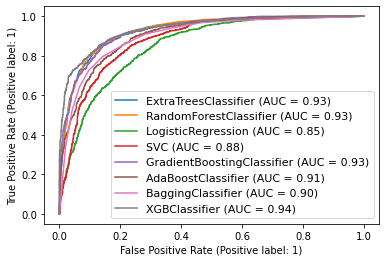

In [120]:
disp = plot_roc_curve(XT,x_test,y_test)     # ax_=Axes with confusion matrix
plot_roc_curve(RFC, x_test, y_test, ax=disp.ax_)
plot_roc_curve(LR, x_test, y_test, ax=disp.ax_)
plot_roc_curve(svc, x_test, y_test, ax=disp.ax_)
plot_roc_curve(GB, x_test, y_test, ax=disp.ax_)
plot_roc_curve(ABC, x_test, y_test, ax=disp.ax_)
plot_roc_curve(BC, x_test, y_test, ax=disp.ax_)
plot_roc_curve(XGB, x_test, y_test, ax=disp.ax_)

plt.legend(prop={'size':11}, loc='lower right')
plt.show()

From ROC AUC curve also we can figure out that ExtraTreeClassifier have maximum accuracy

# Hyper Parameter Tuning

In [121]:
# ExtraTrees Classifier

parameters = {'criterion' : ['gini','entropy'],
              'random_state' : [10, 50, 1000],
              'max_depth' : [0, 10, 20],
              'n_jobs' : [-2, -1, 1],
              'n_estimators' : [50,100, 200, 300]}
GCV=GridSearchCV(ExtraTreesClassifier(),parameters,cv=5)
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [0, 10, 20],
                         'n_estimators': [50, 100, 200, 300],
                         'n_jobs': [-2, -1, 1],
                         'random_state': [10, 50, 1000]})

In [122]:
GCV.best_params_

{'criterion': 'entropy',
 'max_depth': 20,
 'n_estimators': 100,
 'n_jobs': -2,
 'random_state': 50}

In [123]:
FinalModel = ExtraTreesClassifier(criterion='entropy', max_depth=20, n_estimators=300, n_jobs=-2, random_state=1000)
FinalModel.fit(x_train, y_train)
pred = FinalModel.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

86.69887278582931


# The Accuracy of our Model 86.69%

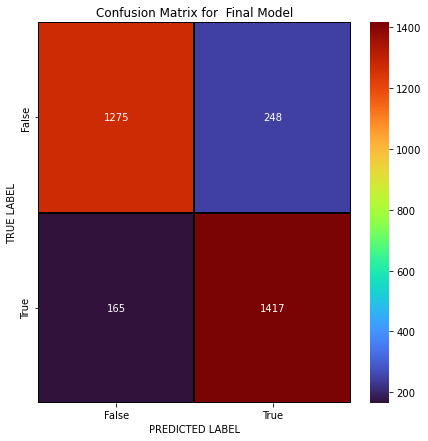

In [124]:
# Lets plot confusion matrix for  FinalModel
cm = confusion_matrix(y_test,pred)

x_axis_labels = ["False","True"]
y_axis_labels = ["False","True"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="turbo",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for  Final Model')
plt.show()

# Plotting ROC Curve for the best model

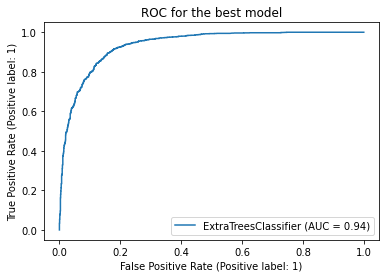

In [125]:
# Let's check the Auc for the best model after hyper parameter tuning
plot_roc_curve(FinalModel, x_test, y_test)
plt.title("ROC for the best model")
plt.show()

# Saving the model

In [126]:
# Saving the model using .pkl
import joblib
joblib.dump(FinalModel,"Customer_Churn_Analysis.pkl")

['Customer_Churn_Analysis.pkl']

# Let's load the saved model and get the prediction

In [127]:
# Loading the saved model
model=joblib.load("Customer_Churn_Analysis.pkl")

#Prediction
prediction = model.predict(x_test)
prediction

array([0, 0, 1, ..., 1, 0, 0])

In [128]:
Original=np.array(y_test)

In [129]:
Model_result=pd.DataFrame()
Model_result['Actual Data']=Original
Model_result['Prediction']=prediction
Model_result

,Actual Data,Prediction
0,0,0
1,0,0
2,1,1
3,0,1
4,0,0
...,...,...
3100,1,1
3101,1,1
3102,1,1
3103,0,0


The predicted and actual data are almost same. So Customer Churn predicted

As Customer Churn Directly affecting Business Profitability, all sould take neccessary steps to reduce the same

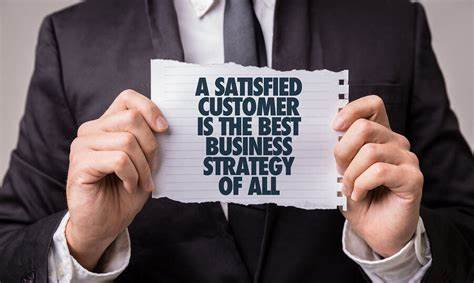